Compare different inter-cluster distances

ward


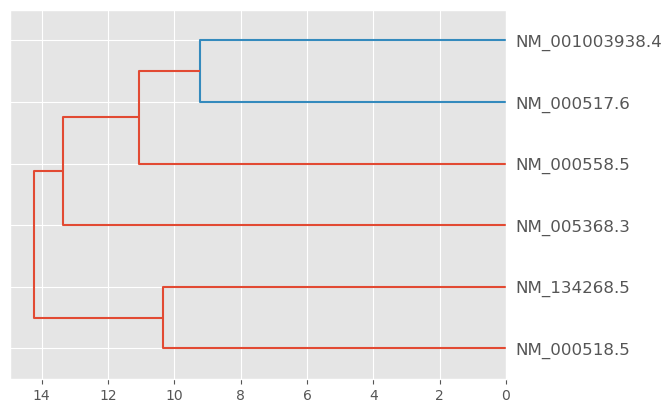

single


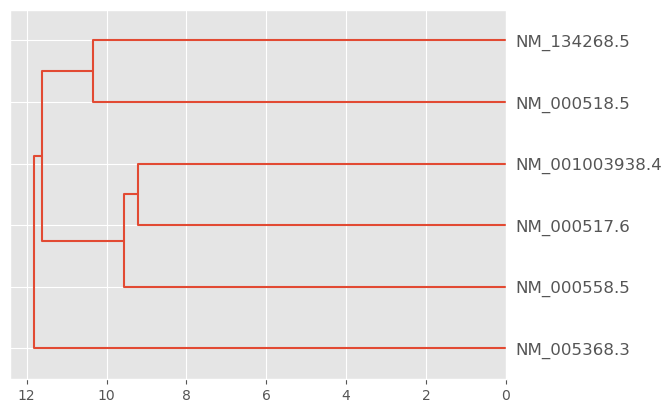

complete


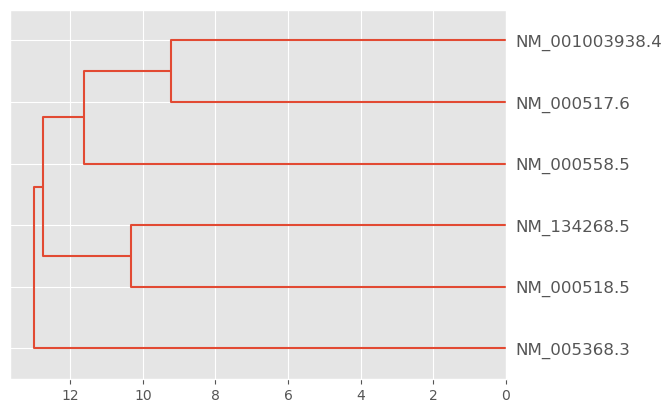

centroid


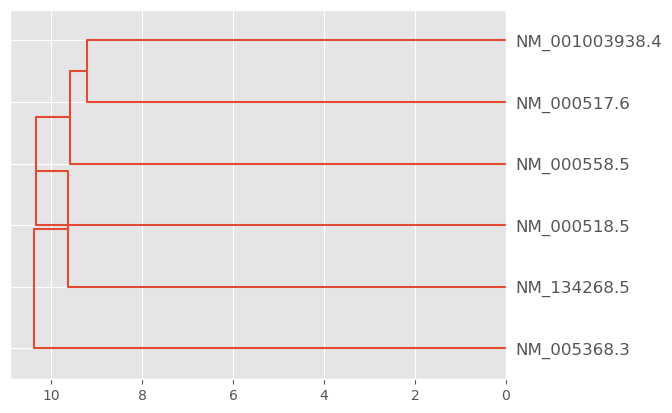

median


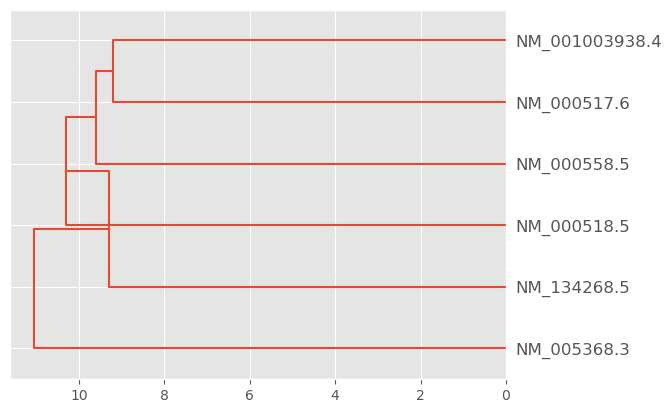

weighted


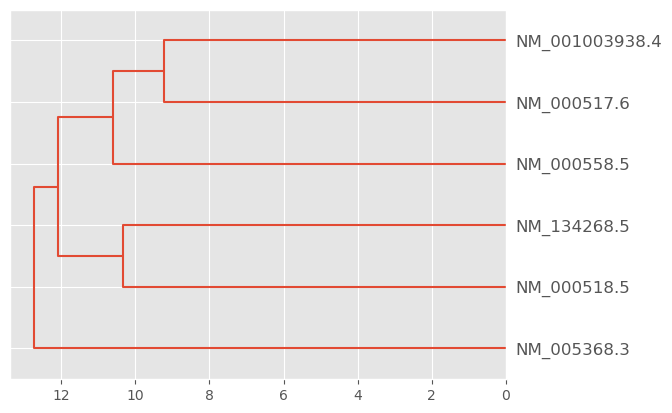

average


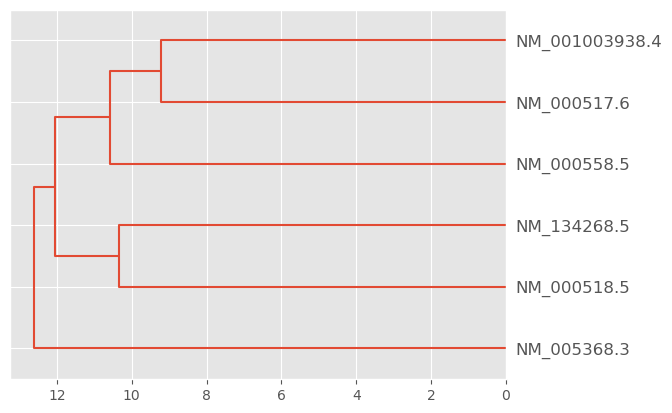

In [51]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import utils
from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt
from autoembedding.embeddings_matrix import build_embeddings_matrix
#InteractiveShell.ast_node_interactivity = "all"

PATH = "dataset/globins/globins.json"
#PATH = "dataset/NEIS2157/NEIS2157.json"

embeddings_dict = utils.get_embeddings_dict(PATH)

IDs, embeddings_matrix = build_embeddings_matrix(
    embeddings_dict = embeddings_dict,
    embedder="dnabert",
    combiner_method="cut"
)

methods = ["ward", "single", "complete", "centroid", "median", "weighted", "average"]

condensed_distances = pdist(embeddings_matrix)

for method in methods:
    print(method)
    # Perform hierarchical clustering
    Z = linkage(condensed_distances, method=method)
    # Plot dendrogram
    dendrogram(Z, orientation="left", labels=IDs)

    plt.show()

# Get cluster labels
#max_d =30  # set the maximum distance between clusters
#labels = fcluster(Z, max_d, criterion='distance')
#print(labels)

INFO  : Finished optimising at entanglement 0.06 (tanglegram.tangle)
INFO  : Done. Use matplotlib.pyplot.show() to show plot. (tanglegram.tangle)


['NM_000517.6', 'NM_000518.5', 'NM_000558.5', 'NM_001003938.4', 'NM_005368.3', 'NM_134268.5'] ['NM_000518.5', 'NM_134268.5', 'NM_005368.3', 'NM_000558.5', 'NM_000517.6', 'NM_001003938.4']


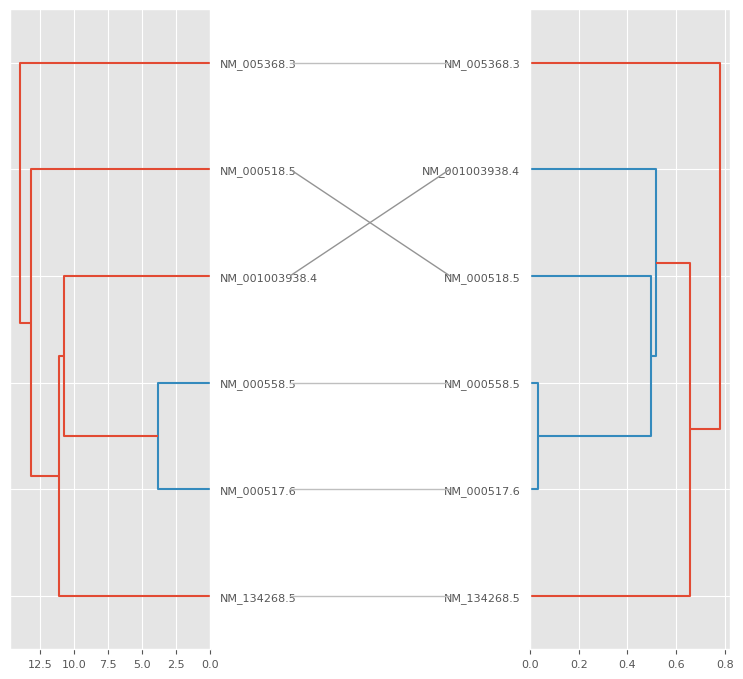

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tanglegram as tg

# Building the embedding matix
IDs, embeddings_matrix_A = build_embeddings_matrix(
    embeddings_dict = embeddings_dict,
    embedder="rep",
    combiner_method="none"
)

# Scaling
scaler = StandardScaler()
embeddings_matrix_A = scaler.fit_transform(embeddings_matrix_A)

# Principal component analysis
pca = PCA()
embeddings_matrix_A = pca.fit_transform(embeddings_matrix_A)

# Buliding an array encoding the pairwise distances between rows (observations) in the embedding matrix
condensed_distances_A = pdist(embeddings_matrix_A, metric="euclidean")

# Calculating the hierarchical clustering 
linkage_matrix_A = linkage(condensed_distances_A, method="average")

gt_matrix, gt_IDs = utils.newick_to_linkage("./dataset/globins/globins.dnd")

# Plot tanglegram   
fig = tg.plot(
    linkage_matrix_A, 
    gt_matrix,
    labelsA=IDs,
    labelsB=gt_IDs,
    #sort="step2side", 
    link_kwargs = {},
    dend_kwargs={}
)

#plt.show()
print(gt_IDs, IDs)

['NM_000517.6',
 'NM_000518.5',
 'NM_000558.5',
 'NM_001003938.4',
 'NM_005368.3',
 'NM_134268.5']

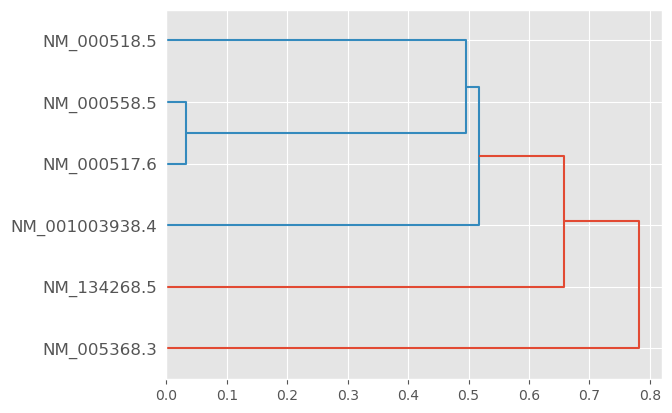

In [53]:
dendrogram(gt_matrix, labels=gt_IDs, orientation="right")
gt_IDs

['NM_000518.5',
 'NM_134268.5',
 'NM_005368.3',
 'NM_000558.5',
 'NM_000517.6',
 'NM_001003938.4']

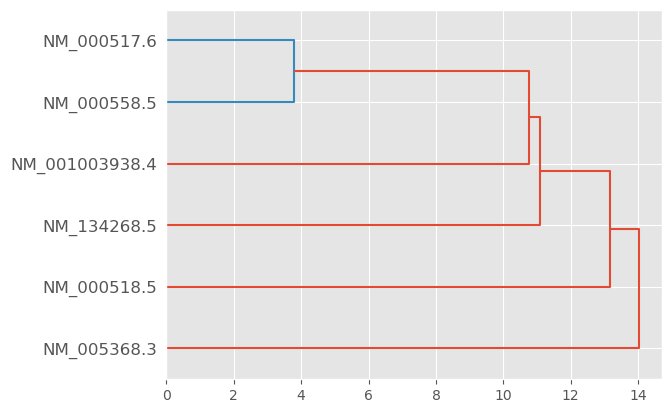

In [54]:
dendrogram(linkage_matrix_A, labels=IDs, orientation="right")
IDs

In [55]:
labels = cut_tree(linkage_matrix_A, n_clusters=2)
labels

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0]])

In [56]:
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import adjusted_rand_score

n_clusters = 2

gt_labels = cut_tree(gt_matrix, n_clusters=n_clusters)
print(gt_labels)
gt_labels = [l[0] for l in gt_labels]

pred_labels = cut_tree(linkage_matrix_A, n_clusters=n_clusters)
print(pred_labels)
pred_labels = [l[0] for l in pred_labels ]

adjusted_rand_score(labels_true=gt_labels, labels_pred=pred_labels)


[[0]
 [0]
 [0]
 [0]
 [1]
 [0]]
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]]


-0.2

Phylogenetic tree with clustalw2

In [57]:
from Bio.Align.Applications import ClustalwCommandline
from Bio import Phylo
import utils
from ete3 import ClusterTree

#cmd =  ClustalwCommandline("clustalw2", infile="dataset/NEIS2157.fasta", outfile="dataset/NEIS2157_aligned.aln")
#stdout, stderr = cmd()
#tree = Phylo.read("dataset/NEIS2157.dnd", format="newick")



In [58]:


#dendrogram(l_matrix, labels= IDsNW, orientation="right")

In [59]:
fig = tg.plot(
    l_matrix, 
    linkage_matrix_B,
    labelsA=IDsNW,
    labelsB=IDs,
    sort="step2side", 
    link_kwargs = {},
    dend_kwargs={}
)

NameError: name 'l_matrix' is not defined